# inicio


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
from google.colab import drive
drive.mount('/content/drive')
import numpy.matlib
import numpy as np
import cv2

from math import factorial
import pandas as pd
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
scipy
from random import sample

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat
import scipy.io
import numpy as np

polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat').get('polpa_prata')
casca_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_prata.mat').get('casca_prata')

polpa_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_nanica.mat').get('polpa_nanica')
casca_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_nanica.mat').get('casca_nanica')

polpa_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_maca.mat').get('polpa_maca')
casca_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_maca.mat').get('casca_maca')

In [ ]:
print(np.shape(polpa_prata))
print(np.shape(casca_prata))
print(np.shape(polpa_nanica))
print(np.shape(casca_nanica))
print(np.shape(polpa_maca))
print(np.shape(casca_maca))

(380, 320, 230)
(236, 320, 230)
(400, 320, 230)
(290, 320, 230)
(385, 320, 230)
(231, 320, 230)


# plote das amostras

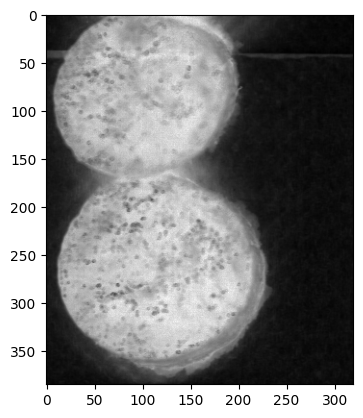

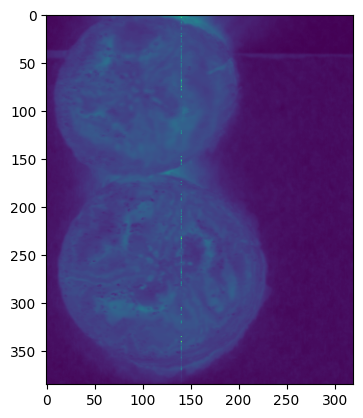

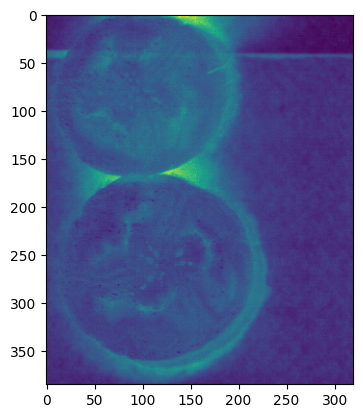

In [ ]:
img0=polpa_maca[:,:,1]
img1=polpa_maca[:,:,115]
img2=polpa_maca[:,:,229]
# img3=polpa_maca[:,:,229]
plt.imshow(img0, cmap='gray')
plt.show()

plt.imshow(img1 )
plt.show()

plt.imshow(img2 )
plt.show()

# plt.imshow(img3 )
# plt.show()

# funcoes


In [ ]:
def get_targets(data,classe):
    temp = data['class']
    data = data.drop(['class'], axis = 1)
    temp = temp.to_numpy()
    count = 0
    for item in temp:
        if item !=0 or item == 0:
            temp[count]=classe
        count +=1
    temp = pd.DataFrame(temp, columns=['class'])
    return pd.concat([data,temp], axis=1)

In [ ]:
def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  return df

In [ ]:
def moveAxis(data):

  data = np.moveaxis(data, 2, 0)
  # ep.plot_rgb(data, title='Visualizando amostra', figsize=(8, 4))
  # plt.show()

  return data

In [ ]:


def getClusters(image = None,INDEX = None, c = None, rgb = None):

      ind = realIdx(INDEX, c)
      out_i = np.concatenate((ind, ind, ind), axis=0).reshape((3, *(image.shape)))


      image = MinMaxScaler(feature_range=(0, 1)).fit_transform(image)
      image = np.stack((image, image, image), axis=2)

      image[out_i[0] != 0, 0] = rgb[0]
      image[out_i[1] != 0, 1] = rgb[1]
      image[out_i[2] != 0, 2] = rgb[2]

      return image


In [ ]:
def rgbscale(image):

    return (image * 255).astype(np.uint8)

In [ ]:
def realIdx(idx, c):

    out = np.arange(idx.shape[0])
    for idx, (rid, vec) in enumerate(zip(out, idx)):
        if vec != c:
            out[idx] = -1
    out[out == -1] = 0

    return out

In [ ]:
def hsi2matrixTeste(matrix: np.ndarray):

  return matrix.T.reshape((matrix.shape[1] * matrix.shape[2], matrix.shape[0]), order='F')

In [ ]:
def sum_idx_array(idx):
        ind_r = []
        for i, (j, ind) in enumerate(zip(idx, np.arange(idx.shape[0]))):
            if j != ind:
                ind_r.append(i)

        return np.delete(idx, ind_r), np.array(ind_r)

In [ ]:
def matrix2hsi(matrix: np.ndarray, rows: int, cols: int):

    """
        Reorganizar a matriz 2D em uma matriz 3D
        forma final (-1, linhas, colunas)

        Parâmetros:
            - matriz: Matriz em formato numpy
            - rows: Número de linhas
            - cols: Número de colunas
        Retorno:
            - Matriz 3D
    """
    return matrix.T.reshape(-1, rows, cols)

In [ ]:
def rev_idx_array(idx, rmv, shape=None, tfill=None):
    """
        Criar um array de idx de acordo com
        idx e rmv, matrizes de índices
    """

    if shape is None:
        out = np.zeros(idx.shape[0] + rmv.shape[0])
    else:
        out = np.zeros(shape)

    out[rmv] = 0

    if tfill is not None:
        for i, row in enumerate(idx):
            out[row] = tfill[i]
    else:
        out[idx] = 1

    return out.astype(int)

In [ ]:
#Retorna o rotulo de cada pixel ao seu correpondente cluster
#É executado empregando as classes com os algoritmos PCA e K-means

from sklearn.cluster import KMeans

def hsiRemoveBackground(X=None):
    # Aqui, estamos removendo a parte do PCA e aplicando diretamente o K-means
    return KMeans(n_clusters=2, init='k-means++', n_init=5, max_iter=300).fit(hsi2matrixTeste(X)).labels_


In [ ]:
def Casca(CUBE=None):
    CUBE2 = moveAxis(CUBE)
    INDEX2 = hsiRemoveBackground(CUBE2) + 1  # Removido o argumento 'PCS'
    image2 = CUBE2[50,:,:]

    out_i_casca = getClusters(image2, INDEX2, 1, (1, 0, 0))
    out_i2_casca = getClusters(image2, INDEX2, 2, (0, 1, 0))

    plt.imshow(out_i_casca)
    plt.show()

    plt.imshow(out_i2_casca)
    plt.show()

    cluster = input('Is the cluster of interest red-1 or green-2?')

    ind2, rm2 = sum_idx_array(realIdx(INDEX2, int(cluster)))
    sample_cluster = rev_idx_array(ind2, rm2)

    result = getClusters(image2, sample_cluster, 1, (0, 0, 0))

    plt.imshow(result)
    plt.show()

    return ind2, result


def Polpa(CUBE=None):
    CUBE = moveAxis(CUBE)
    INDEX = hsiRemoveBackground(CUBE) + 1  # Removido o argumento 'PCS'
    image = CUBE[50,:,:]
    cub = matrix2hsi(INDEX, CUBE.shape[1], CUBE.shape[2])

    out_i_polpa = getClusters(image, INDEX, 1, (1, 0, 0))
    out_i2_polpa = getClusters(image, INDEX, 2, (0, 1, 0))

    plt.imshow(out_i_polpa)
    plt.show()

    plt.imshow(out_i2_polpa)
    plt.show()

    cluster2 = input('Is the cluster of interest red-1 or green-2?')

    ind, rm = sum_idx_array(realIdx(INDEX, int(cluster2)))
    sample_cluster = rev_idx_array(ind, rm)

    result = getClusters(image, sample_cluster, 1, (0, 0, 0))

    plt.imshow(result)
    plt.show()

    return ind, result





# remocao de fundo


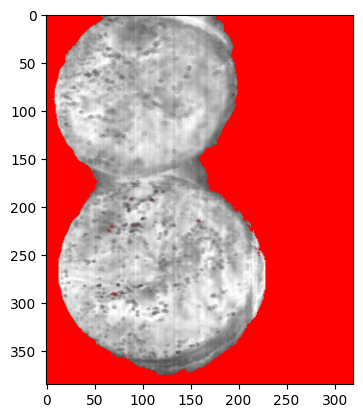

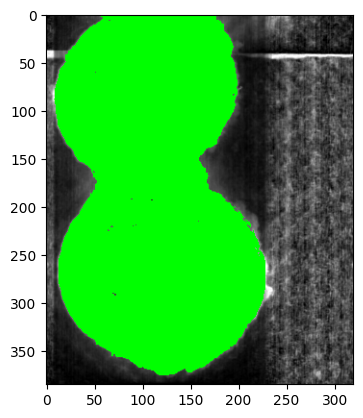

Is the cluster of interest red-1 or green-2?1


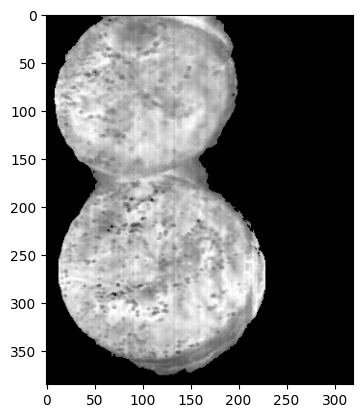

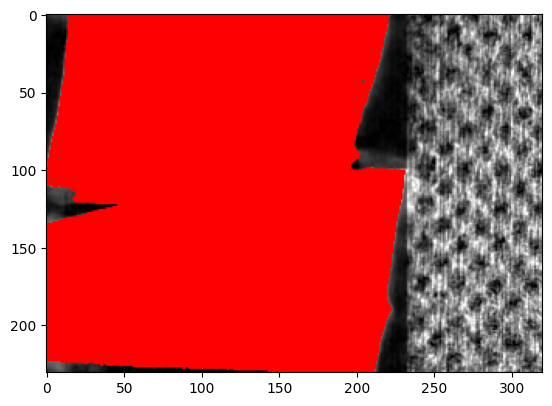

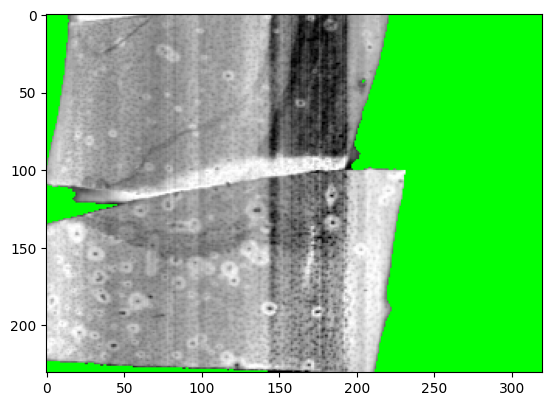

Is the cluster of interest red-1 or green-2?1


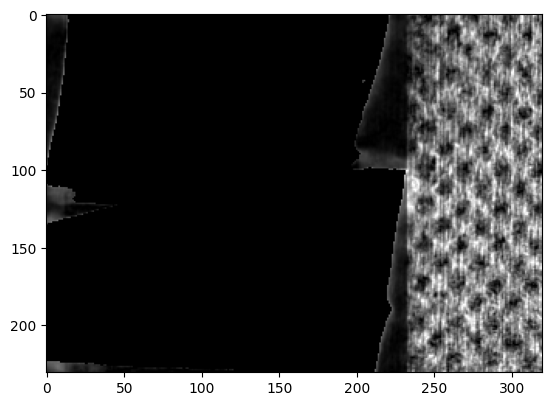

In [ ]:
Polpa_Maca,result_polpa_maca=Polpa(polpa_maca)
Casca_Maca,result_cascas_maca=Casca(casca_maca)

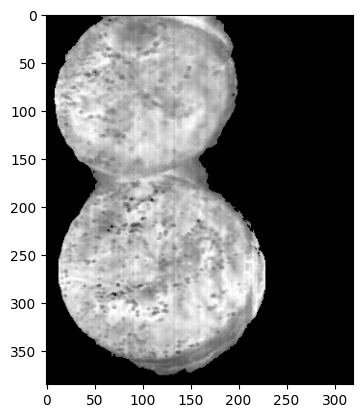

In [ ]:
plt.imshow( result_polpa_maca)
plt.show()

In [ ]:
#---------------------------------------------------------------------------

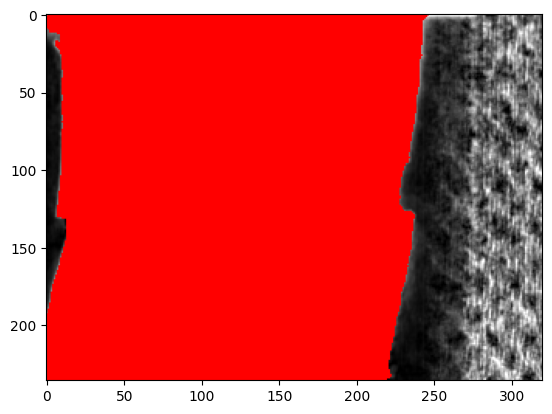

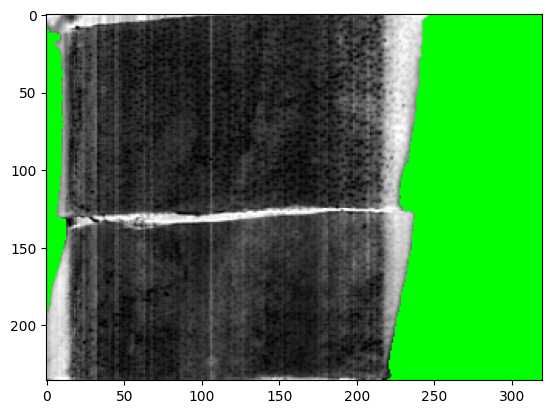

Is the cluster of interest red-1 or green-2?1


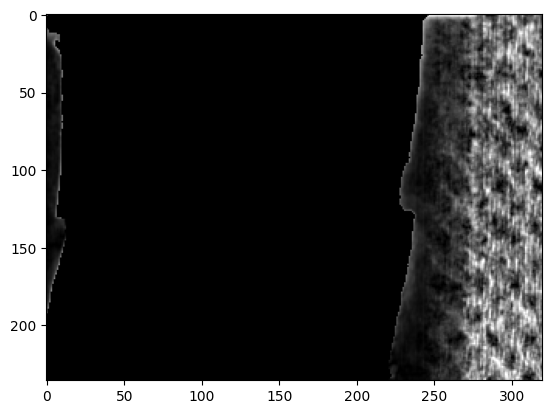

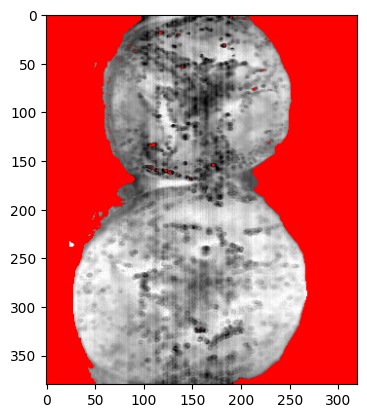

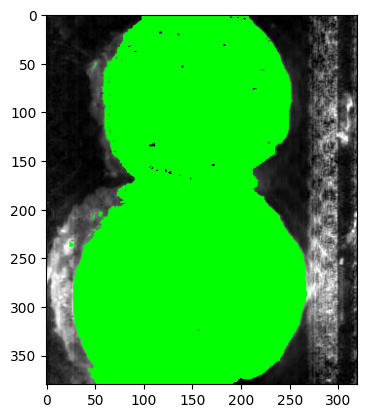

Is the cluster of interest red-1 or green-2?2


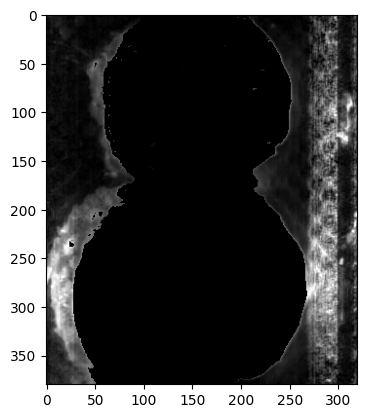

In [ ]:
Casca_Prata,result_casca_prata=Casca(casca_prata)
Polpa_Prata,result_polpa_prata=Polpa(polpa_prata)

In [ ]:
#----------------------------------------------------------------------------------

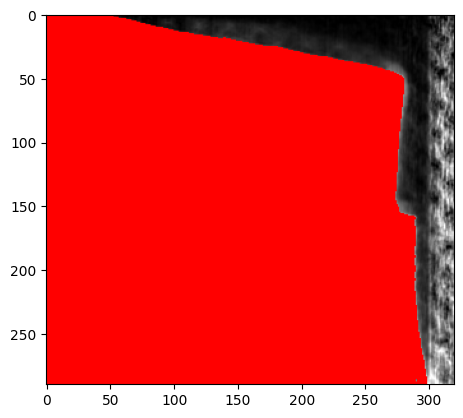

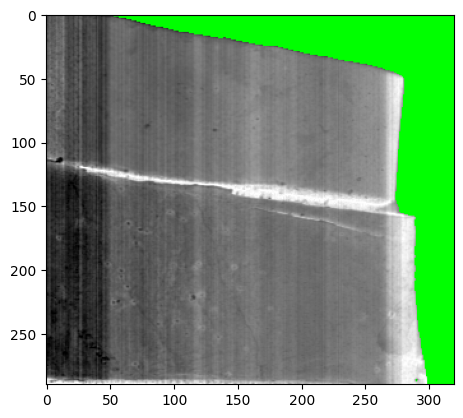

Is the cluster of interest red-1 or green-2?2


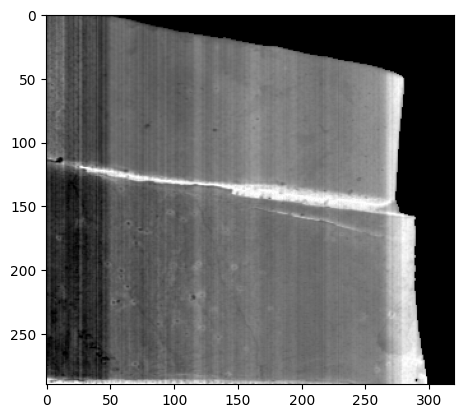

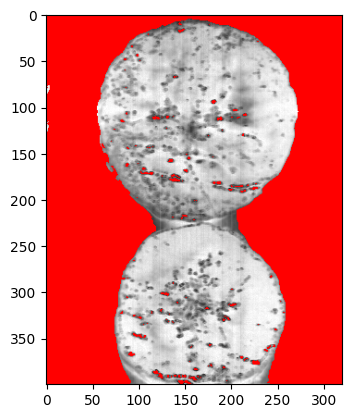

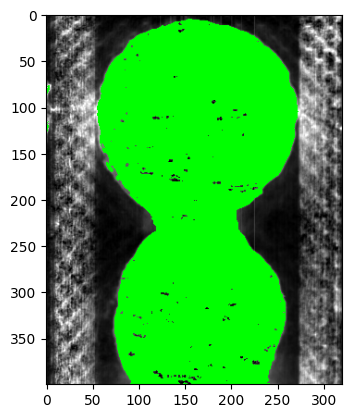

Is the cluster of interest red-1 or green-2?2


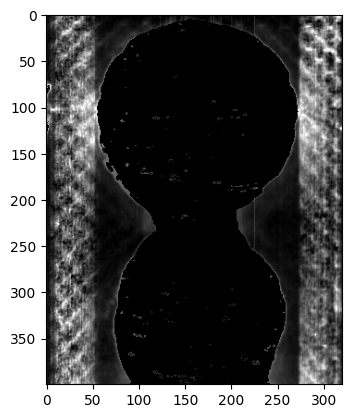

In [ ]:
Casca_Nanica,result_casca_nanica=Casca(casca_nanica)
Polpa_Nanica,result_polpa_nanica=Polpa(polpa_nanica)

In [ ]:
def plot_cub(data):

    plt.axes([-.11, -.11, .5, .5])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( data)

    plt.axes([-.16, -.16, .5, .5])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( data)

    plt.axes([-.21, -.21, .5, .5])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( data)

    plt.axes([-.26, -.26, .5, .5])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( data)

    plt.axes([-.31, -.31, .5, .5])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( data)



    plt.show()
    # plt.imsave("hipercubo.png", dpi=300)
def plot_vet(result_maca,result_prata,result_nanica):

    plt.axes([0, .0, .55, .55])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( result_maca)

    plt.axes([0, .5506, .5501, .5501])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( result_prata)

    plt.axes([0, -.5, .5501, .5501])
    plt.xticks(())
    plt.yticks(())
    plt.imshow( result_nanica)



    plt.show()

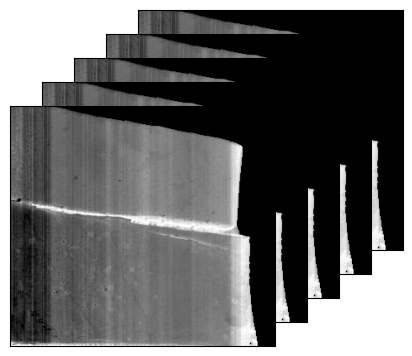

In [ ]:
plot_cub(result_casca_nanica)

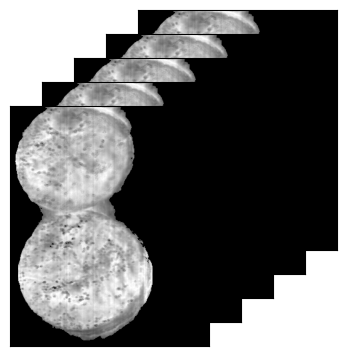

In [ ]:
plot_cub(result_polpa_maca)

#train test

In [ ]:
def get_xy(amostra,ind,tar,ts):

    # amostra= amostra sem modificaçao
    # ind = os pixels dejesejado sem fundo
    # tar = target
    # ts = porcentagem para teste e treino
    # Retorna na cequencia y_test, y_train, X_test, X_train

    ts=ts

    test=moveAxis(amostra)
    test=hsi2matrixTeste(test)

    # espectral=(0,230)
    # xtest=np.array([]).reshape(0,espectral[1] - espectral[0])
    # xtrain=np.array([]).reshape(0,espectral[1] - espectral[0])

    y_test = np.array([])
    y_train = np.array([])

    id_train,id_test=train_test_split(ind,test_size=ts,shuffle=False)

    # X_test = np.concatenate((xtest, test[id_test]))
    # X_train = np.concatenate((xtrain, test[id_train]))

    X_test= test[id_test]
    X_train=test[id_train]

    y = np.ones(id_test.shape) * tar
    y_test = np.concatenate((y_test, y))

    y = np.ones(id_train.shape)*tar
    y_train = np.concatenate((y_train, y))

    return y_test, y_train, X_test, X_train

In [ ]:
ytest_pm,ytrain_pm,xtest_pm,xtrain_pm = get_xy(polpa_maca,Polpa_Maca,1,0.43)
ytest_cm, ytrain_cm, xtest_cm, xtrain_cm= get_xy(casca_maca,Casca_Maca,1,0.47)

In [ ]:
print(ytest_pm.shape,ytrain_pm.shape,xtrain_pm.shape,xtest_pm.shape)

(26364,) (34946,) (34946, 230) (26364, 230)


In [ ]:
ytest_pp, ytrain_pp, xtest_pp, xtrain_pp= get_xy(polpa_prata,Polpa_Prata,2,0.43)
ytest_cp, ytrain_cp, xtest_cp, xtrain_cp= get_xy(casca_prata,Casca_Prata,2,0.51)

In [ ]:
print(ytest_pp.shape, ytrain_pp.shape, xtest_pp.shape, xtrain_pp.shape)

(30475,) (40395,) (30475, 230) (40395, 230)


In [ ]:
ytest_pn, ytrain_pn, xtest_pn, xtrain_pn= get_xy(polpa_nanica,Polpa_Nanica,3,0.57)
ytest_cn, ytrain_cn, xtest_cn, xtrain_cn= get_xy(casca_nanica,Casca_Nanica,3,0.45)

In [ ]:
print(ytest_pn.shape, ytrain_pn.shape, xtest_pn.shape, xtrain_pn.shape)

(36431,) (27482,) (36431, 230) (27482, 230)


In [ ]:
xtrain= np.concatenate([xtrain_pm, xtrain_cm, xtrain_pn, xtrain_cn, xtrain_pp,xtrain_cp])
xtest= np.concatenate([xtest_pm, xtest_cm, xtest_pn, xtest_cn, xtest_pp, xtest_cp])
ytrain= np.concatenate([ytrain_pm, ytrain_cm, ytrain_pn, ytrain_cn, ytrain_pp, ytrain_cp])
ytest= np.concatenate([ytest_pm, ytest_cm, ytest_pn, ytest_cn, ytest_pp, ytest_cp])

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(163247, 230) (150300, 230) (163247,) (150300,)


In [ ]:
ytest[50:]

array([1., 1., 1., ..., 2., 2., 2.])

# MLP

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier


In [ ]:
from sklearn.utils import shuffle

xtrain,ytrain=shuffle(xtrain,ytrain)


In [ ]:
# clf=  MLPClassifier(max_iter=200,verbose=6)
vec_lr = [0.0025, 0.000025, 0.005, 0.05,0.0005]
vec_hidden = [(100,50,100,),(100,200,100,),(50,25,50,),(10,20,10,),(10,10,10,),(100,100,100,),(100,150,20,),(50,50,50,),(128,128,128,),(75,20,75,),(256,256,10,), (256,), (100,),(512,),(128,), (100,50,),(100,100) ]
vec_solver = ['sgd', 'adam']
best_score = 0
params_best_model = {}
i = 0
for lr in vec_lr:
  for hidden in vec_hidden:
    for optmizer in vec_solver:
      clf=  MLPClassifier(verbose=False, validation_fraction = 0.2,
                          learning_rate_init = lr,
                          max_iter=400,
                          shuffle=True,
                          solver = optmizer,
                          hidden_layer_sizes=hidden,
                          n_iter_no_change = 10,
                          early_stopping=True)
      clf.fit(xtrain,ytrain)
      scr = clf.score(xtest, ytest)
      print(i)
      i=i+1
      if scr > best_score:
        best_score = scr
        params_best_model = {
            'learning_rate_init' : lr,
            'hidden_layer_sizes' : hidden,
            'solver' : optmizer
        }
        print(best_score)




0
0.8420292747837658
1
0.8454624085163007
2
3
4
0.8460745176314038
5
6
0.8605389221556886
7
8
9
0.8719228210246174
10
11
12
13
0.8762475049900199
14
15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


16
0.8765602129075183


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


17
18


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


19


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


20
0.8948037258815702


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


22


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


23


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AttributeError: ignored

In [ ]:
print(f'Best Score: {best_score}')
print('Best params:')
print(params_best_model)


Best Score: 0.8948037258815702
Best params:
{'learning_rate_init': 0.0025, 'hidden_layer_sizes': (256, 256, 10), 'solver': 'sgd'}


In [ ]:
clf=  MLPClassifier(verbose=True,
                    validation_fraction = 0.2,
                    learning_rate_init = params_best_model['learning_rate_init'],
                    max_iter=400,
                    shuffle=True,
                    solver = params_best_model['solver'],
                    hidden_layer_sizes=params_best_model['hidden_layer_sizes'],
                    n_iter_no_change = 10,
                    early_stopping=True)



clf.fit(xtrain,ytrain)

scr = clf.score(xtest, ytest)

Iteration 1, loss = 0.82931141
Validation score: 0.701685
Iteration 2, loss = 0.67148017
Validation score: 0.771730
Iteration 3, loss = 0.59859422
Validation score: 0.770138
Iteration 4, loss = 0.55460282
Validation score: 0.761593
Iteration 5, loss = 0.52050696
Validation score: 0.781623
Iteration 6, loss = 0.49227176
Validation score: 0.801286
Iteration 7, loss = 0.56432540
Validation score: 0.748974
Iteration 8, loss = 0.49923683
Validation score: 0.797366
Iteration 9, loss = 0.48013027
Validation score: 0.805145
Iteration 10, loss = 0.48237101
Validation score: 0.812037
Iteration 11, loss = 0.45611997
Validation score: 0.826799
Iteration 12, loss = 0.41360684
Validation score: 0.834150
Iteration 13, loss = 0.38403683
Validation score: 0.816355
Iteration 14, loss = 0.36470989
Validation score: 0.827657
Iteration 15, loss = 0.35086135
Validation score: 0.846799
Iteration 16, loss = 0.34127378
Validation score: 0.872925
Iteration 17, loss = 0.33194227
Validation score: 0.849648
Iterat

In [ ]:
# Plota as perdas ao longo das épocas
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(test_losses, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Perdas (Loss) dos dados de treinamento e teste')
plt.legend()
plt.show()

Relatório de Classificação para Treino:
               precision    recall  f1-score   support

  Banana_maca       0.97      0.97      0.97     60482
 Banana_prata       0.86      0.90      0.88     66612
Banana_nanica       0.80      0.73      0.77     36153

     accuracy                           0.89    163247
    macro avg       0.88      0.87      0.87    163247
 weighted avg       0.89      0.89      0.89    163247



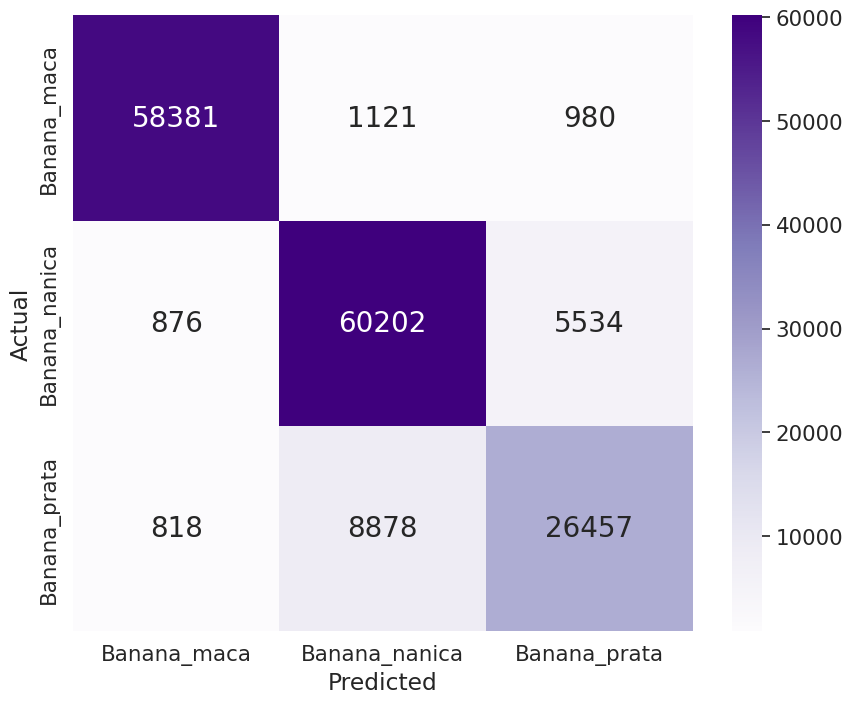

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

# Acurácia para treino
y_train_hat = clf.predict(xtrain)

names = ['Banana_maca', 'Banana_prata', 'Banana_nanica']  # Substitua com suas classes reais

# Matriz de Confusão para treino
data_train = confusion_matrix(ytrain, y_train_hat)
df_cm_train = pd.DataFrame(data_train, columns=np.unique(names), index=np.unique(names))

df_cm_train.index.name = 'Actual'
df_cm_train.columns.name = 'Predicted'

# Plotando a matriz de confusão para treino
plt.figure(figsize=(10, 8))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_train, cmap="Purples", annot=True, annot_kws={"size": 20}, fmt='d')
plt.savefig('confusion_matrix_train.png', dpi=300)

# Relatório de classificação para treino
print("Relatório de Classificação para Treino:")
print(classification_report(ytrain, y_train_hat, target_names=names))

Relatório de Classificação para Teste:
               precision    recall  f1-score   support

  Banana_maca       0.93      0.91      0.92     49011
 Banana_prata       0.75      0.94      0.83     57763
Banana_nanica       0.94      0.65      0.77     43526

     accuracy                           0.84    150300
    macro avg       0.87      0.83      0.84    150300
 weighted avg       0.86      0.84      0.84    150300



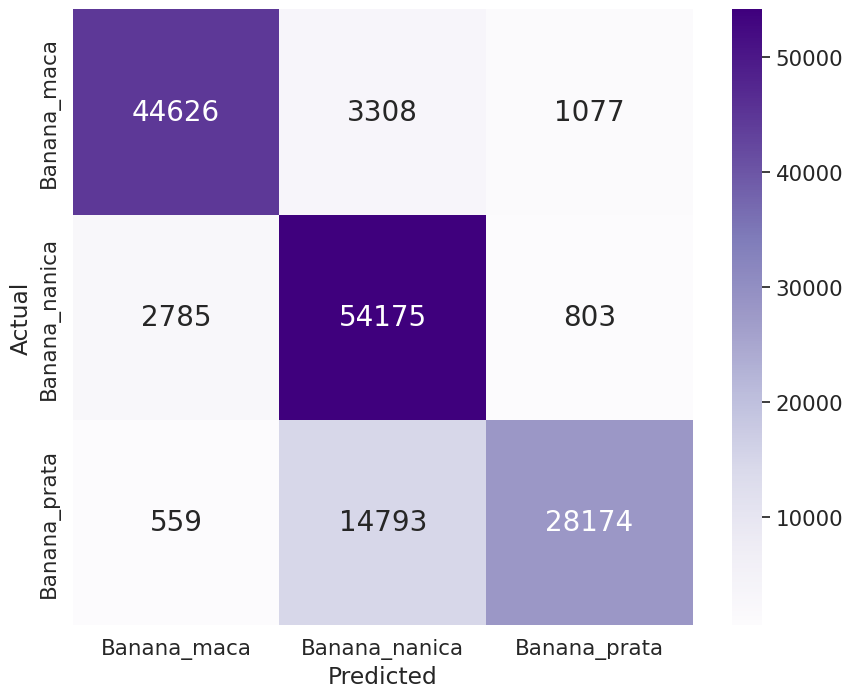

In [ ]:
y_hat = clf.predict(xtest)

names = ['Banana_maca', 'Banana_prata', 'Banana_nanica']  # Substitua com suas classes reais

# Matriz de Confusão
data = confusion_matrix(ytest, y_hat)
df_cm = pd.DataFrame(data, columns=np.unique(names), index=np.unique(names))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plotando a matriz de confusão
plt.figure(figsize=(10, 8))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Purples", annot=True, annot_kws={"size": 20}, fmt='d')
plt.savefig('confusion_matrix.png', dpi=300)

# Relatório de classificação
print("Relatório de Classificação para Teste:")
print(classification_report(ytest, y_hat, target_names=names))

In [ ]:
print(xtrain.shape)

(163247, 230)


In [ ]:
print(ytest.shape)

(150300,)
